Import relevant modules

In [1]:
#import relevant modules
from astroquery.jplhorizons import Horizons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions
import subprocess
import os
import time
import csv
import math

Object and observatory details

In [2]:
object = '2001 QQ142'
obs_code = 995

Jackknifing process - removing observations one-by-one 

In [3]:
elements = []
rows = []
os.chdir('C:\\Users\\bradl\\.vscode\\advanced_lab')
with open(f'Data/{object}_data.txt') as file:
    for line in file:
        rows.append(line)
no_of_observations = len(rows)
print(rows)

for i in range(2, no_of_observations):
    os.chdir('C:\\Users\\bradl\\.vscode\\advanced_lab')
    temp = rows[0:i] + rows[i+1:len(rows)]
    print(temp)
    with open('temp_data.txt', 'w') as file:
        file.writelines(temp)
    functions.run_find_orb(f'temp_data.txt')
    fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist, fo_epoch, fo_mean_anomaly = functions.read_fo_elements('elements.txt')
    fo_elements = np.array([fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist], dtype=np.float64)
    if i == no_of_observations-1:
        best_fit_elements = fo_elements
    elements.append(fo_elements)
print(elements)
print(best_fit_elements)
errors = np.std(elements, axis=0)
print(errors)

['123456789|123456789|123456789|123456789|123456789|123456789|123456789|123456789|\n', '<-ObjDesig->*nnYYYY MM DD.DDDDD HH MM SS.SSSsdd mm ss.ss<blanks >MM.MMBz<ref>COD\n', '2001 QQ142     2024 01 06.83455 10 55 58.38 +48 52 06.41                     995 0.216 0.207\n', '2001 QQ142     2024 01 12.92742 10 49 41.13 +51 33 43.46                     995 0.137 0.082\n', '2001 QQ142     2024 01 17.77295 10 42 10.00 +52 57 15.42                     995 0.198 0.169\n', '2001 QQ142     2024 01 30.85489 10 16 22.71 +54 07 22.38                     995 0.176 0.160\n', '2001 QQ142     2024 02 03.12121 10 09 43.34 +53 55 22.71                     950 0.074 0.056\n', '2001 QQ142     2024 02 03.93787 10 08 08.77 +53 50 16.93                     995 0.168 0.159\n', '2001 QQ142     2024 02 11.86519 09 54 00.24 +52 34 12.42                     995 0.243 0.091\n', '2001 QQ142     2024 02 07.82536 10 00 49.75 +53 19 18.00                     995 0.277 0.123\n']
['123456789|123456789|123456789|123456789|1

In [4]:
print([i[0] for i in elements])

np.std([i[0] for i in elements])

[337.94831, 337.94704, 337.9473, 337.94672, 337.94673, 337.9469, 337.94635, 337.94677]


0.0005525622136857655

In [5]:
functions.write_orbital_parameters(object, fo_epoch, fo_mean_anomaly, fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc)
print(fo_epoch)

2024 02 11


In [6]:
start_date = '2023-11-01T14:00:00'
no_of_days = 3000

minor 0.03321292704078086 -0.03768222909467339 -0.12074131198736278
 
Sun   -0.7761723294245211 -0.6186328504808906 4.175629042018919e-05
 
DIFF  0.8093852564653019 0.5809506213862172 -0.12078306827778297
 
minor 0.03150659159466679 -0.03641752794942632 -0.11836253106007132
 
Sun   -0.765059124369943 -0.631927353581598 4.27008066893792e-05
 
DIFF  0.7965657159646098 0.5955098256321717 -0.11840523186676069
 
minor 0.029797567035764718 -0.035138410266154205 -0.115948914239269
 
Sun   -0.753713942415373 -0.6450320123893971 4.349614084820541e-05
 
DIFF  0.7835115094511378 0.609893602123243 -0.1159924103801172
 
minor 0.028085426553061114 -0.0338459136375446 -0.1135009691181262
 
Sun   -0.7421398521785151 -0.6579427058701346 4.413990516740591e-05
 
DIFF  0.7702252787315762 0.62409679223259 -0.11354510902329361
 
minor 0.026369786986800207 -0.03254103185608225 -0.11101924071272987
 
Sun   -0.7303397707085206 -0.6706550760638749 4.463566333444909e-05
 
DIFF  0.7567095576953209 0.6381140442077

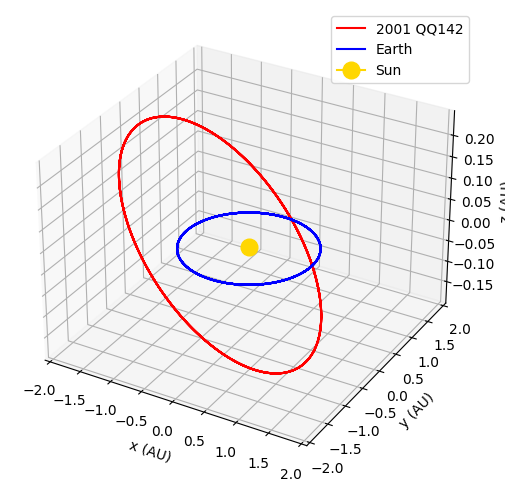

[45230.083333333336, 45231.083333333336, 45232.083333333336, 45233.083333333336, 45234.083333333336, 45235.083333333336, 45236.083333333336, 45237.083333333336, 45238.083333333336, 45239.083333333336, 45240.083333333336, 45241.083333333336, 45242.083333333336, 45243.083333333336, 45244.083333333336, 45245.083333333336, 45246.083333333336, 45247.083333333336, 45248.083333333336, 45249.083333333336, 45250.083333333336, 45251.083333333336, 45252.083333333336, 45253.083333333336, 45254.083333333336, 45255.083333333336, 45256.083333333336, 45257.083333333336, 45258.083333333336, 45259.083333333336, 45260.083333333336, 45261.083333333336, 45262.083333333336, 45263.083333333336, 45264.083333333336, 45265.083333333336, 45266.083333333336, 45267.083333333336, 45268.083333333336, 45269.083333333336, 45270.083333333336, 45271.083333333336, 45272.083333333336, 45273.083333333336, 45274.083333333336, 45275.083333333336, 45276.083333333336, 45277.083333333336, 45278.083333333336, 45279.083333333336,

In [7]:
dates, suns, earths, minors, diffs = functions.find_xyz(start_date, no_of_days)

0.03706658259034155


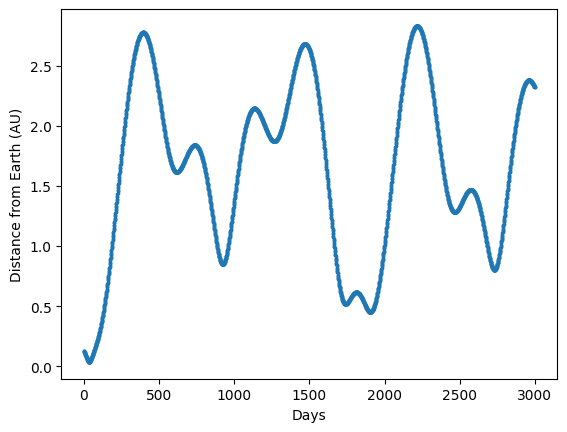

In [8]:
"""print(dates)
print(diffs)
print(earths)
print(diffs - earths)"""
earth_distance = diffs - earths
earth_distances = [np.sqrt(np.sum(np.array(element)**2)) for element in earth_distance]
#print(earth_distances)
plt.scatter(np.array(dates)-dates[0], earth_distances, s = 3)
plt.xlabel('Days')
plt.ylabel('Distance from Earth (AU)')
plt.savefig(f'plots/{object}_distance_from_Earth', bbox_inches='tight')
print(np.min(earth_distances))